# TP Clustering
## Bernardo CARDOSO CORDEIRO
## Télécom ParisTech - 15/08/2016

## Partie 1 - K-Means

### Question 1

In [1]:
import numpy as np
import random

def compute_labels(X, centroids):
    """Compute labels.

    Parameters
    ----------
    X: array-like, shape (n_samples, n_features)
        List of n_features-dimensional data points. Each row corresponds
        to a single data point.

    centroids: array-like, shape (n_clusters, n_features)
        The estimated centroids.

    Returns
    -------
    labels : array, shape (n_samples,)
        The labels of each sample
    """
    n_samples, n_features = X.shape
    n_clusters, n_features = centroids.shape
    labels = np.zeros(n_samples)

    for i in range(n_samples):
        dist_min = float("inf")
        for j in range(n_clusters):
            dist = np.sum((X[i,:] - centroids[j,:])**2)
            if dist < dist_min:
                label = j
                dist_min = dist
        labels[i] = label
    return labels



def compute_inertia_centroids(X, labels, n_clusters):
    """Compute inertia and centroids.

    Parameters
    ----------
    X: array-like, shape (n_samples, n_features)
        List of n_features-dimensional data points. Each row corresponds
        to a single data point.

    labels : array-like, shape (n_saples,)
        The labels of each sample.

    Returns
    -------
    inertia: float
        The inertia.

    centroids: array-like, shape (n_clusters, n_features)
        The estimated centroids.
    """
    n_samples, n_features = X.shape
    cardinals = np.zeros(n_clusters)
    
    centroids = np.zeros(shape=(n_clusters,n_features))
    
    #Calculating centroids
    for i in range(n_samples):
        cluster = int(labels[i])
        cardinals[cluster] += 1
        centroids[cluster,:] += X[i,:]
    for clu in range(n_clusters):
        centroids[clu,:] = centroids[clu,:]/cardinals[clu]

    #Calculating inertia
    inertia = 0
    for i in range(n_samples):
        label = labels[i]
        inertia += np.sum((X[i,:] - centroids[label,:])**2)
    return inertia, centroids


def kmeans(X, n_clusters, max_iter=100, tol=1e-7, random_state=42):
    """Estimate position of centroids and labels.

    Parameters
    ----------
    X: array-like, shape (n_samples, n_features)
        List of n_features-dimensional data points. Each row corresponds
        to a single data point.

    n_clusters: int
        The desired number of clusters.

    max_iter: int, defaults 100.
        Max number of update.

    tol: float, defaults 1e-7.
        The tolerance to check convergence.

    random_state: int, defaults to 42.
        A random number generator instance.

    Returns
    -------
    centroids: array-like, shape (n_clusters, n_features)
        The estimated centroids.

    labels: array-like, shape (n_samples,)
        The estimated labels.

    inertia: float
        The inertia.
    """
    n_samples, n_features = X.shape
    iter = 1
    
    #Generate first centroids
    random.seed(random_state)
    centroids = np.zeros(shape=(n_clusters,n_features))
    for c in range(n_clusters):
        centroids[c] = X[random.randint(0, n_samples-1),:]
    labels = compute_labels(X, centroids)
    
    inertia_change = float("inf")
    inertia, centroids = compute_inertia_centroids(X, labels, n_clusters)
    #Remove the comments in the two prints to see the inertia going down
    #print "Initial inertia = " + str(inertia)
    while (inertia_change > tol and iter <= max_iter):
        labels = compute_labels(X, centroids)
        new_inertia, centroids = compute_inertia_centroids(X, labels, n_clusters)
        inertia_change = inertia - new_inertia
        inertia = new_inertia
        iter += 1
        #print "Inertia iteration " + str(iter) +": " + str(inertia)
    return centroids, labels, inertia

In [2]:
from sklearn.datasets import make_blobs

# Parameters
random_state = 0
n_samples = 1000
color = 'rgbcmyk'

# Generate data
X, y = make_blobs(n_samples=n_samples, random_state=random_state,
                      centers=3)

### Question 2

**REMARQUE: Pour voir l'inértie décroitre, comme dans la question traitées ci-dessous, il faut enlever le symbole de commentaire pour les deux *print* dans le code du kmeans**

In [95]:
centroids, labels, inertia = kmeans(X, 3, max_iter=100, tol=1e-7, random_state=42)

Initial inertia = 1842.02132623
Inertia iteration 2: 1715.47907802
Inertia iteration 3: 1691.09515186
Inertia iteration 4: 1685.97242256
Inertia iteration 5: 1685.7317234
Inertia iteration 6: 1685.7317234


C:\Users\Berne\Anaconda2\lib\site-packages\ipykernel\__main__.py:75: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


On peut remarquer ci-dessus que l'inértie décroit à chaque itération, comme attendu.

### Question 3

3 clusters, random state = 42
3 clusters, random state = 49
10 clusters, random state = 42
10 clusters, random state = 44
15 clusters, random state = 42
15 clusters, random state = 44


C:\Users\Berne\Anaconda2\lib\site-packages\ipykernel\__main__.py:74: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


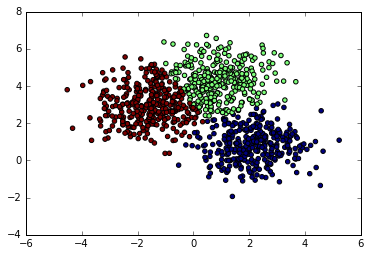

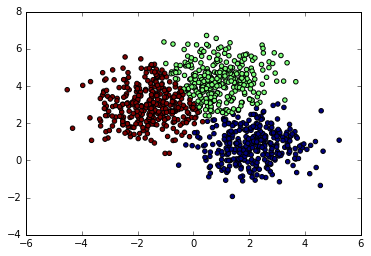

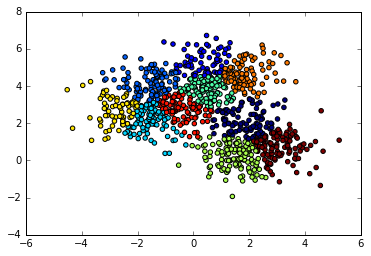

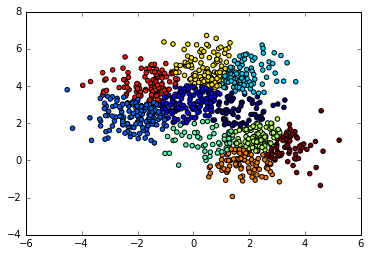

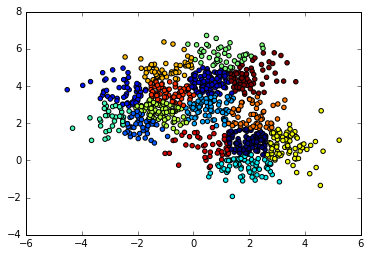

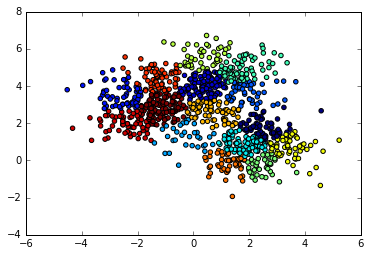

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt

print "3 clusters, random state = 42"
centroids, labels, inertia = kmeans(X, 3, max_iter=100, tol=1e-7, random_state=42)
plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels)

print "3 clusters, random state = 49"
centroids, labels, inertia = kmeans(X, 3, max_iter=100, tol=1e-7, random_state=49)
plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels)

print "10 clusters, random state = 42"
centroids, labels, inertia = kmeans(X, 10, max_iter=100, tol=1e-7, random_state=42)
plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels)

print "10 clusters, random state = 44"
centroids, labels, inertia = kmeans(X, 10, max_iter=100, tol=1e-7, random_state=44)
plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels)

print "15 clusters, random state = 42"
centroids, labels, inertia = kmeans(X, 15, max_iter=100, tol=1e-7, random_state=42)
plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels)

print "15 clusters, random state = 44"
centroids, labels, inertia = kmeans(X, 15, max_iter=100, tol=1e-7, random_state=44)
plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels)

Pour un nombre réduit de clusters (par exemple, 3 clusters), c'est difficile de voir ce phénomène même en initialisant le générateur de nombres avec des valeurs très différentes. Quand on augmente le nombre de clusters, ce phénomène devient plus visible: les cas avec 10 clusters ou 15 clusters montrent deux résultats possibles pour le même ensemble de données.

### Question 4

In [5]:
%%timeit
centroids, labels, inertia = kmeans(X, 3, max_iter=100, tol=1e-7, random_state=42)

10 loops, best of 3: 127 ms per loop


C:\Users\Berne\Anaconda2\lib\site-packages\ipykernel\__main__.py:74: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [9]:
%%timeit
from sklearn import cluster 
kmeans = cluster.KMeans(n_clusters=3, n_init=10) 
kmeans.fit(X)
labels_scikit = kmeans.labels_

100 loops, best of 3: 16.6 ms per loop


**Réponse question 4**
<br>Le temps d'éxecution de l'algorithme de scikit-learn est d'environ 16.6ms, alors que l'algorithme construit manuellement prend environ 127ms, une différence considérable de temps.

Les résultats finals sont, malgré ce fait, très similaire (voire pareil); on peut constater cela en regardant les images ci-dessous:

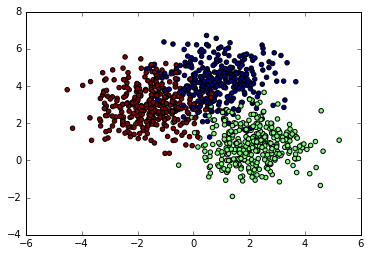

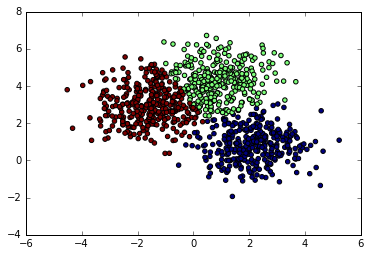

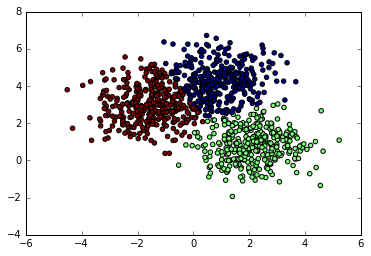

In [71]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)

plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels)

plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels_scikit)

La première image montre l'ensemble de données tel qu'il a été généré par le *make_blobs*. Ensuite, l'image au milieu montre le résultat de l'algorithme implémenté, alors que la dernière image montre le résultat obtenu par scikit-learn. Bien que les couleurs soient différentes, les trois groupes trouvés sont en essence les mêmes.

## Partie 2 - Calcul optimal du nombre de cluster

### Question 5

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.datasets import make_blobs


def compute_log_inertia(X, n_clusters, T, bb_min, bb_max,
                        random_state=0):
    """Compute the log inertia of X and X_t.

    Parameters
    ----------
    X: array-like, shape (n_samples, n_features)
        List of n_features-dimensional data points. Each row corresponds
        to a single data point.

    n_clusters: int
        The desired number of clusters.

    T: int
        Number of draws of X_t.

    bb_min: array, shape (n_features,)
        Inferior corner of the bounding box of X.

    bb_max: array, shape (n_features,)
        Superior corner of the bounding box of X.

    random_state: int, defaults to 0.
        A random number generator instance.

    Returns
    -------
    log_inertia: float
        Log of the inertia of the K-means applied to X.

    mean_log_inertia_rand: float
        Mean of the log of the inertia of the K-means applied to the different
        X_t.

    std_log_inertia_rand: float
        Standard deviation of the log of the inertia of the K-means applied to
        the different X_t.
    """
    random.seed(random_state)
    n_samples, n_features = X.shape
    Gi = np.zeros(T)
    
    for i in range(T):
        #Generate random dataset
        Xi = np.zeros(shape=(n_samples, n_features))
        for n in range(n_samples):
            for f in range(n_features):
                Xi[n, f] = random.uniform(bb_min[f], bb_max[f])
        centroids, labels, inertia = kmeans(Xi, n_clusters, max_iter=100, tol=1e-7, random_state=random.getstate())
        Gi[i] = inertia
    
    centroids, labels, X_inertia = kmeans(X, n_clusters, max_iter=100, tol=1e-7, random_state=random.getstate())

    for i in range(T):
        Gi[i] = math.log(Gi[i])
    mean_log_inertia_rand = Gi.mean()
    std_log_inertia_rand = Gi.std()
    
    log_inertia = math.log(X_inertia)
    
    return log_inertia, mean_log_inertia_rand, std_log_inertia_rand

### Question 6

In [3]:
def compute_gap(X, n_clusters_max, T=10, random_state=0):
    """Compute values of Gap and delta.

    Parameters
    ----------
    X: array-like, shape (n_samples, n_features)
        List of n_features-dimensional data points. Each row corresponds
        to a single data point.

    n_cluster_max: int
        Maximum number of cluster to test.

    T: int, defaults 10.
        Number of draws of X_t.

    random_state: int, defaults to 0.
        A random number generator instance.

    Returns
    -------
    n_clusters_range: array-like, shape (n_clusters_max-1,)
        Array of number of clusters tested.

    gap: array-like, shape (n_clusters_max-1,)
        Return the gap values.

    delta: array-like, shape (n_clusters_max-1,)
        Return the delta values.
    """
    n_samples, n_features = X.shape
    bb_min = np.zeros(n_features)
    bb_max = np.zeros(n_features)

    for i in range(n_features):
        bb_min[i] = X[:,i].min()
        bb_max[i] = X[:,i].max()
        
    random.seed(random_state)
    
    #for gaps and sigmas, position 0 corresponds to cluster k = 2, 1 to cluster k = 3 and so on
    #if n_clusters_max is 10, it will create 9 positions, where the last one is for cluster k=11
    #this is due to the fact we need to calculate the gap and sigma of k=11 to obtain the delta of k=10 (n_clusters_max)
    
    gap = np.zeros(n_clusters_max - 1)
    sigma = np.zeros(n_clusters_max - 1)
    
    for i in range(2, n_clusters_max + 1):
        log_inertia, mean_log_inertia_rand, std_log_inertia_rand = compute_log_inertia(X, i, T, bb_min, bb_max, random_state=random.getstate())
        gap[i-2] = mean_log_inertia_rand - log_inertia
        sigma[i-2] = math.sqrt(std_log_inertia_rand*(T+1)/float(T))
        
    #deltas takes into account the gap of the following k value, so it cannot be calculated for the last one
    delta = np.zeros(n_clusters_max - 2)
    
    for k in range(n_clusters_max - 2):
        delta[k] = gap[k] - gap[k + 1] + sigma[k + 1]
    return gap, delta

### Question 7

In [5]:
from sklearn.datasets import make_blobs

# Parameters
random_state = 0
n_samples = 1000
color = 'rgbcmyk'

# Generate data
X, y = make_blobs(n_samples=n_samples, random_state=random_state,
                      centers=3)

In [6]:
gap, delta = compute_gap(X, 10)

C:\Users\Berne\Anaconda2\lib\site-packages\ipykernel\__main__.py:74: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(9L,)
(9L,)


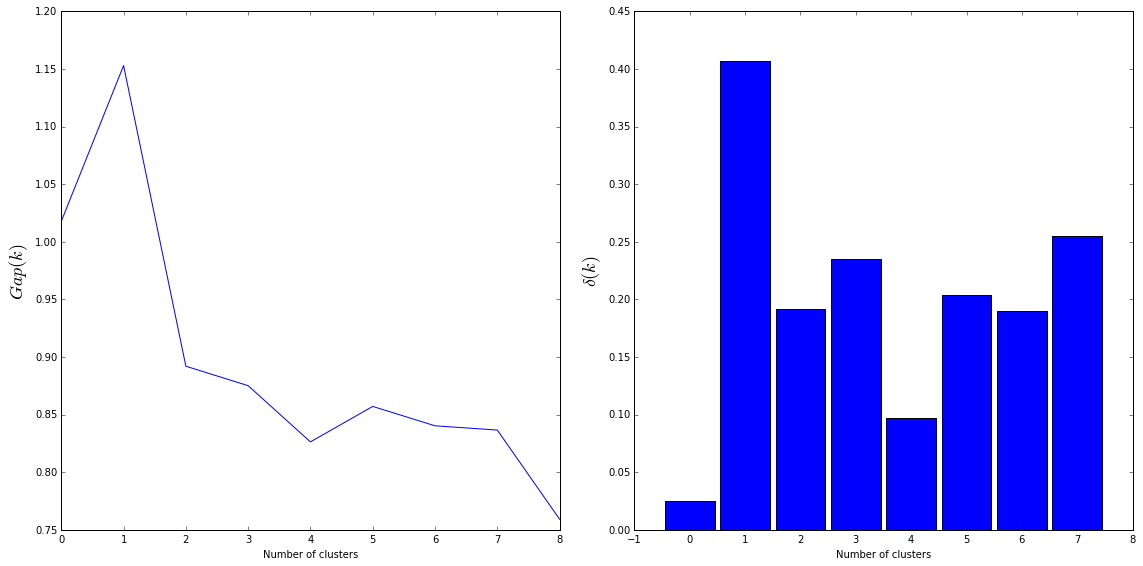

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_result(n_clusters_range, gap, delta):
    """Plot the values of Gap and delta.

    Parameters
    ----------
    n_clusters_range: array-like, shape (n_clusters_max-1,)
        Array of number of clusters tested.

    gap: array-like, shape (n_clusters_max-1,)
        Return the gap values.

    delta: array-like, shape (n_clusters_max-1,)
        Return the delta values.
    """
    plt.figure(figsize=(16, 8))
    plt.subplots_adjust(left=.05, right=.98, bottom=.08, top=.98, wspace=.15,
                        hspace=.03)

    plt.subplot(121)
    plt.plot(n_clusters_range, gap)
    plt.ylabel(r'$Gap(k)$', fontsize=18)
    plt.xlabel("Number of clusters")

    plt.subplot(122)
    for x, y in zip(n_clusters_range, delta):
        plt.bar(x - .45, y, width=0.9)
    plt.ylabel(r'$\delta(k)$', fontsize=18)
    plt.xlabel("Number of clusters")

    plt.draw()

rang = np.array((range(9)))
print rang.shape
print gap.shape
plot_result(rang, gap, delta)

Pour le nombre de clusters, il faut incrémenter l'axe horizontal de 2. Donc, l'indice 0 indique la présence de 2 clusters et ainsi de suite.

Pour le choix automatique du nombre de clusters, la valeur maximale du "gap" s'avère plus sûre. Puisque le "delta" prend en considération les différences entre les valeurs contiguës, si une différence très grande entre deux valeurs petites de "gap" est présente, donc on risque de sélectionner une mauvaise quantité de clusters.

### Question 8

In [8]:
def optimal_n_clusters_search(X, n_clusters_max, T=10, random_state=0):
    """Compute the optimal number of clusters.

    Parameters
    ----------
    X: array-like, shape (n_samples, n_features)
        List of n_features-dimensional data points. Each row corresponds
        to a single data point.

    n_cluster_max: int
        Maximum number of cluster to test.

    T: int, defaults 10.
        Number of draws of X_t.

    random_state: int, defaults to 0.
        A random number generator instance.

    Returns
    -------
    n_clusters_optimal: int
        Optimal number of clusters.
    """
    gap, delta = compute_gap(X, n_clusters_max, T, random_state=random.getstate())
    return np.argmax(gap) + 2

In [10]:
X, y = make_blobs(n_samples=n_samples, random_state=random_state,
                      centers=3)

n_clusters_chosen = optimal_n_clusters_search(X, 10, 10, 0)
print n_clusters_chosen

C:\Users\Berne\Anaconda2\lib\site-packages\ipykernel\__main__.py:74: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Berne\Anaconda2\lib\site-packages\ipykernel\__main__.py:68: RuntimeWarning: invalid value encountered in divide


3


## Partie 3 - Spectral Clustering

In [21]:
"""Spectral clustering analysis."""
import numpy as np

from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.neighbors import BallTree
from scipy.sparse import coo_matrix
import scipy as sp
from sklearn import cluster


def compute_affinity_matrix(X, epsilon=None):
    """Compute the affinity matrix from the number of neighbors.

    Parameters
    ----------
    X: array-like, shape (n_samples, n_features)
        List of n_features-dimensional data points. Each row corresponds
        to a single data point.

    epsilon: float | None.
        epsilon parameter to define the neighborhood of each sample.
        If None, it is inferred from the data.

    Returns
    -------
    affinity_matrix: array-like, shape (n_samples, n_samples)
        Affinity matrix.
    """
    n_samples, _ = X.shape

    if epsilon is None:
        epsilon = 3. * np.mean(BallTree(X).query(X, 10)[0][:, -1])

    ind, d = BallTree(X).query_radius(X, r=epsilon, return_distance=True)
    data_pos = np.array([[value, r, c]
                        for r, (ind_r, data_r) in enumerate(zip(ind, d))
                        for c, value in zip(ind_r, data_r)])
    data_pos[:, 0] = np.exp(-.5 * (data_pos[:, 0] / epsilon) ** 2)

    W = coo_matrix((data_pos[:, 0], (data_pos[:, 1], data_pos[:, 2])),
                   shape=(n_samples, n_samples), dtype=np.float)
    #W = W.toarray()

    return W


def spectral_clustering(X, n_clusters=2, n_neighbors=10):
    """Compute the affinity matrix from the number of neighbors.

    Parameters
    ----------
    X: array-like, shape (n_samples, n_features)
        List of n_features-dimensional data points. Each row corresponds
        to a single data point.

    n_cluster: int, defaults to 2
        The number of clusters to form.

    n_neighbors: int, defaults to 10
        Number of neighbors considered to compute the affinity matrix.

    Returns
    -------
    labels: array-like, shape (n_samples,)
        The estimated labels
    """
    W = compute_affinity_matrix(X)
    #D = np.diag(W.sum(axis = 1))
    D = sp.sparse.diags(np.squeeze(np.asarray(W.sum(axis=1))), 0)
    
    L = D - W

    
    #eigenvalues, eigenvectors = np.linalg.eig(L)
    eigenvalues, eigenvectors = sp.sparse.linalg.eigs(L, k = n_clusters, which='SR')
    index_sorted = np.argsort(eigenvalues)
    
    U = eigenvectors[:,index_sorted[0:n_clusters]]
    
    kmeans = cluster.KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(U) 
    
    return kmeans.labels_, kmeans.cluster_centers_

In [22]:
# Parameters
random_state = 0
n_samples, n_clusters, n_neighbors = 1000, 3, 10

# Data to analyse
datasets = {
    'blobs': make_blobs(n_samples=n_samples, random_state=random_state,
                         centers=2),
     'moons': make_moons(n_samples=n_samples, noise=.05, shuffle=True,
                         random_state=random_state),
     'circles': make_circles(n_samples=n_samples, factor=.5, noise=.05,
                             shuffle=True, random_state=random_state)
}

labels_spectral = {}
labels_kmeans = {}

for name in datasets:
    X = datasets[name][0]
    labels_spectral[name], _ = spectral_clustering(X, 2, 3)
    _ , labels_kmeans[name], _ = kmeans(X, 2, max_iter=100, tol=1e-7, random_state=42)

C:\Users\Berne\Anaconda2\lib\site-packages\ipykernel\__main__.py:74: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


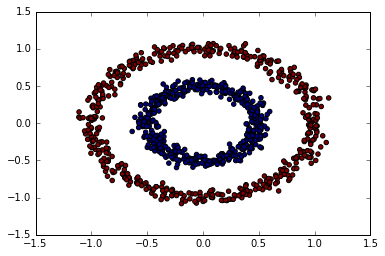

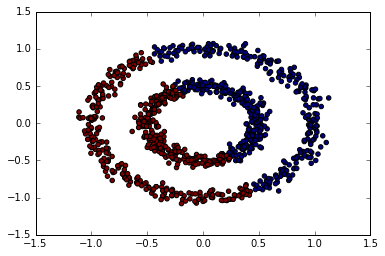

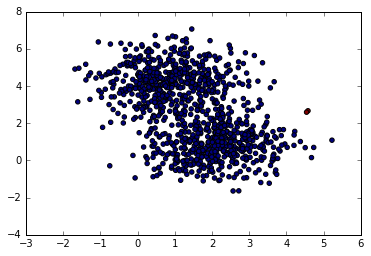

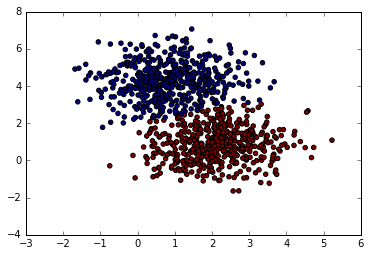

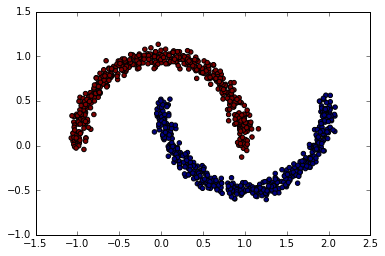

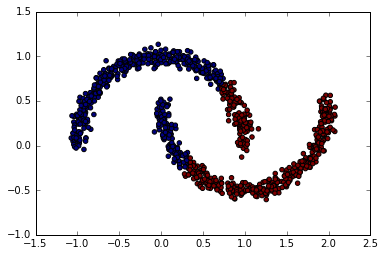

In [23]:
%matplotlib inline 
import matplotlib.pyplot as plt

for name in datasets:
    X = datasets[name][0]
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=labels_spectral[name])
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=labels_kmeans[name])

On constate que l'algorithme du spectral clustering marche beaucoup mieux que le kmeans pour les données "moons" et "circles", mais que le résultat pour les données "blobs" n'est pas idéal.

## Partie 4 - Application à la compression d'images

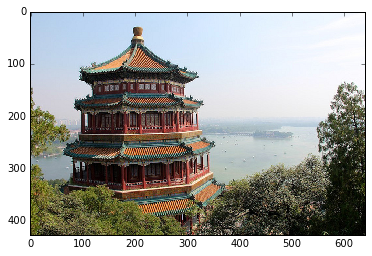

In [24]:
import scipy.ndimage as ndi
from sklearn import cluster
from matplotlib import pyplot as plt

img = ndi.imread('china.jpg')

img_reshaped = img.reshape(-1, 3)

plt.imshow(img, interpolation='nearest')
plt.show()

NUMBER OF CLUSTERS: 8


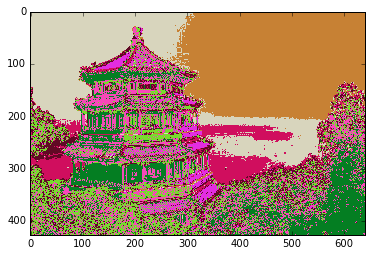

In [62]:
for k in range(8, 9):
    kmeans = cluster.KMeans(n_clusters=k, n_init=10)
    kmeans.fit(img_reshaped)

    n_samples = len(kmeans.labels_)
    n_features = 3
    new_img = np.zeros(shape=(n_samples,3))

    for i in range(len(new_img)):
        new_img[i] = kmeans.cluster_centers_[kmeans.labels_[i]]

    new_img = new_img.reshape(img.shape)

    print "NUMBER OF CLUSTERS: " + str(k)
    plt.imshow(new_img, interpolation='nearest')
    plt.show()

**Les deux parties suivantes sont soit trop longues (kmeans pour le K sans différence dans l'image), soit font planter l'ordinateur (possible problème de mémoire, pour le clustering spectral)**

In [ ]:
for k in range(400*300, 400*300 + 1):
    kmeans = cluster.KMeans(n_clusters=k, n_init=10)
    kmeans.fit(img_reshaped)

    n_samples = len(kmeans.labels_)
    n_features = 3
    new_img = np.zeros(shape=(n_samples,3))

    for i in range(len(new_img)):
        new_img[i] = kmeans.cluster_centers_[kmeans.labels_[i]]

    new_img = new_img.reshape(img.shape)

    print "NUMBER OF CLUSTERS: " + str(k)
    plt.imshow(new_img, interpolation='nearest')
    plt.show()

In [ ]:
for k in range(8, 9):
    labels, centers = spectral_clustering(img_reshaped, 2, 3)
    
    n_samples = len(labels)
    n_features = 3
    new_img = np.zeros(shape=(n_samples,3))

    for i in range(len(new_img)):
        new_img[i] = centers[labels[i]]

    new_img = new_img.reshape(img.shape)

    print "NUMBER OF CLUSTERS: " + str(k)
    plt.imshow(new_img, interpolation='nearest')
    plt.show()